In [2]:

import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2 

DataDir="F:/2022_Summer/divdata/Train"
Categories=["Pre-Injury", "Post-Injury"]

trainingdata=[] 
def createtrainingdata():
    DataDir="F:/2022_Summer/divdata/Train"
#creates a data set of images and labels 
    print("Training data is loading...")
    for category in Categories: 
        path=os.path.join(DataDir,category)
        classnum=Categories.index(category)
        for vid in os.listdir(path):
            vpath=os.path.join(path,vid)
            j=0
            for frame in os.listdir(vpath): 
                img_array=cv2.imread(os.path.join(vpath,frame),0)
                trainingdata.append([img_array,classnum])
    print("Done!")
    return trainingdata 
testingdata=[] 
def createtestingdata():
    DataDir="F:/2022_Summer/divdata/Test"
#creates a data set of images and labels 
    print("Testing data is loading...")
    for category in Categories: 
        path=os.path.join(DataDir,category)
        classnum=Categories.index(category)
        for vid in os.listdir(path):
            vpath=os.path.join(path,vid)
            j=0
            for frame in os.listdir(vpath): 
                img_array=cv2.imread(os.path.join(vpath,frame),0)
                testingdata.append([img_array,classnum])
    print("Done!")
    return testingdata 
                           
trainingdata=createtrainingdata()
testingdata=createtestingdata()

Training data is loading...
Done!
Testing data is loading...
Done!


In [91]:
#Randomizes the order of the data set 
import random 
random.shuffle(trainingdata)
random.shuffle(testingdata)
print("Data is randomized!")
print(len(trainingdata))
print(len(testingdata))

Data is randomized!
2635
1530


In [92]:
#Changes the trainingdata into X and Y numpy arrays to be inputted into the model 
Xtrain=[]
Ytrain=[]
Xtest=[]
Ytest=[]

for features,label in trainingdata:
    Xtrain.append(features)
    Ytrain.append(label)
for features,label in testingdata:
    Xtest.append(features)
    Ytest.append(label)
    
Xtrain=np.array(Xtrain)
Ytrain=np.array(Ytrain)

Xtest=np.array(Xtest)
Ytest=np.array(Ytest)

Xtrain=Xtrain.reshape(-1,Xtrain[1].shape[0],Xtrain[1].shape[1],1)
Xtest=Xtest.reshape(-1,Xtest[1].shape[0],Xtest[1].shape[1],1)


print("Data is formatted!")


Data is formatted!


In [93]:
#saves training data 
import pickle 
pickle_out=open("Xtrain.pickle", "wb")
pickle.dump(Xtrain,pickle_out)
pickle_out.close()
pickle_out=open("Xtest.pickle", "wb")
pickle.dump(Xtest,pickle_out)
pickle_out.close()
pickle_out=open("Ytrain.pickle", "wb")
pickle.dump(Ytrain,pickle_out)
pickle_out.close()
pickle_out=open("Ytest.pickle", "wb")
pickle.dump(Ytest,pickle_out)
pickle_out.close()
print("Data is saved!")

Data is saved!


In [94]:

import tensorflow as tf 
import pickle 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time 
import csv

class_weight = {0: 1,
                1: 4}
    
#NAME="Pre-vs-Post-Injury-CNN-{}".format(int(time.time()))
NAME="Middle(10%),5_Images{}_Adam_Optimizer".format(int(time.time()))
tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(NAME), histogram_freq=1, profile_batch = 0
)
X=pickle.load(open("X.pickle", "rb"))
Y=pickle.load(open("Y.pickle", "rb"))
#Normalizes the values 
X=X/255.0

model=Sequential()
model.add(Conv2D(64, (3,3),input_shape=(425, 425, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(Xtrain,Ytrain, batch_size=32,class_weight=class_weight,epochs=8,validation_split=0.1,callbacks=[tensorboard, tensorboard_callback])

score = model.evaluate(Xtest, Ytest, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import csv
f=open("Test_Stats.csv","a")
writer=csv.DictWriter(f, fieldnames=['Name','Test loss', 'Test accuracy'])
writer.writerow({'Name': str(NAME),'Test loss': str(score[0]),'Test accuracy': str(score[1])})
f.close()

Epoch 1/8
75/75 [==============================] - 6s 71ms/step - loss: 5.3912 - accuracy: 0.5348 - val_loss: 0.6237 - val_accuracy: 0.5379
Epoch 2/8
75/75 [==============================] - 5s 69ms/step - loss: 0.1303 - accuracy: 0.9730 - val_loss: 0.0316 - val_accuracy: 0.9811
Epoch 3/8
75/75 [==============================] - 5s 69ms/step - loss: 0.0269 - accuracy: 0.9941 - val_loss: 5.5518e-04 - val_accuracy: 1.0000
Epoch 4/8
75/75 [==============================] - 5s 70ms/step - loss: 1.9342e-04 - accuracy: 1.0000 - val_loss: 1.6879e-04 - val_accuracy: 1.0000
Epoch 5/8
75/75 [==============================] - 5s 69ms/step - loss: 1.0155e-04 - accuracy: 1.0000 - val_loss: 1.6373e-04 - val_accuracy: 1.0000
Epoch 6/8
75/75 [==============================] - 5s 71ms/step - loss: 8.4324e-05 - accuracy: 1.0000 - val_loss: 1.0043e-04 - val_accuracy: 1.0000
Epoch 7/8
75/75 [==============================] - 5s 70ms/step - loss: 6.3323e-05 - accuracy: 1.0000 - val_loss: 1.0143e-04 - val_a

In [95]:
f.close()
model.save('pre_post_model.h5')

In [96]:
loaded_model = tf.keras.models.load_model('pre_post_model.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

(None, 425, 425, 1)

48/48 [==============================] - 1s 23ms/step


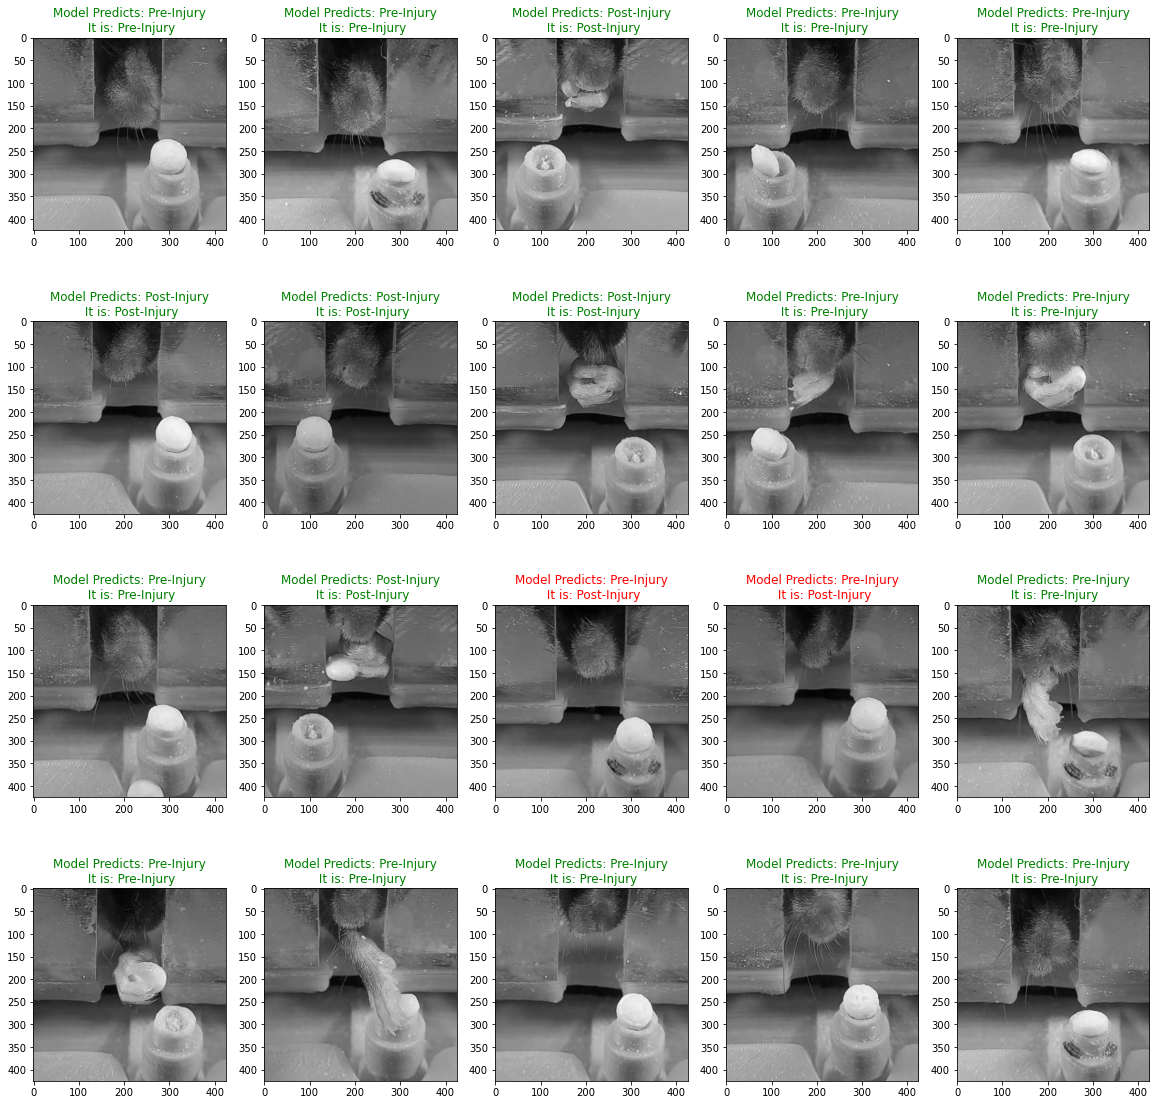

In [97]:

result=loaded_model.predict(Xtest)

fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(Xtest):
    if i<20:
        fig.add_subplot(4,5,(i+1))
        if int(np.round(result[i][0]))!=Ytest[i]:
            plt.title("Model Predicts: " +Categories[int(np.round(result[i][0]))]+"\n It is: "+Categories[int(Ytest[i])],color="red")
        else:
            plt.title("Model Predicts: " +Categories[int(np.round(result[i][0]))]+"\n It is: "+Categories[int(Ytest[i])],color="green")
        plt.imshow(img/256.,cmap="gray")
  
plt.show()